<a href="https://colab.research.google.com/github/cjfghk5697/deeplearnig_practice/blob/imgbot/Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>손글씨 숫자 인식</h1>
이번 절에서는 이미 학습된 매개변수를 사용하여 학습 과정은 생략하고, 추론 과정만 구현 할 거다. 이 추론 과정을 신경망의 '순전파' 라고한다.

<h2>MNIST 데이터 셋</h2>
이번 예에서 사용하는 데이터셋은 MNIST라는 손글씨 숫자 이미지 집합이다. MNIST는 유명한 데이터셋으로, 다양한 논문에서 사용된다.<BR> MNIST의 이미지는 0~9까지의 숫자 이미지로 구성된다. 훈련 이미지가 6만장 시험 이미지가 1만장 준비되어 있다. <BR>

In [ ]:
import sys, os
sys.path.append(os.pardir) #부모 디렉터리의 파일을 가져올 수 있도록 설정
from dataset.mnist import load_manist

(x_train, t_train),(s_test,t_test) =\
  load_minist(flatten=True, normalize=False)
print(x_train.shape) #(60000, 784)
print(t_train.shape) #(60000, )
print(x_test.shape) #(10000, 784)
print(t_test.shape) #(10000, )

load_mnist 함수는 읽은 mnist 데이터를 (훈련 이미지, 훈련 레이블), (시험 이미지, 시험 레이블) 형식으로 반환한다. <br>인수로는 normalize, flatten, one_hot_label 세 가지를 설정할 수 있다. 세 인수 모두 bool 값이다. <br> 첫 번째 인수인 normalize는 입력 이미지의 픽셀 값을 0.0~1.0 사이의 값으로 정규화 할지 결정한다. false로 설정하면 정규화를 안한다.<br>

 두번째 인수인 flatten은 입력이미지를 평탄하게, 즉 1차원 배열로 만들지 정한다.<br> False로 설정하면 이미지를 1*28*28의 3차원 배열로, True를 설정하면 784개의 원소로 이뤄진 1차워 배열로 저장한다.<br>

 세번째 인수인 one_hot_label은 레이블을 원-핫 인코딩 형태로 저장할지 정한다. <br> 원핫코딩이란, 예를 들어 [0,0,0,1,0,0,0] 처럼 정답을 뜻하는 원소만 1이고 나머지는 0인 배열이다. one_hot_label이 false면 '7'이나 '2'와 같이 숫자 형태의 레이블을 저장하고, true이면 원-핫 인코딩하여 저장한다.
<br>
<h2>이미지 불러오기</h2>
이미지 불러오는 것은 PIL 모듈을 사용한다.
  

In [ ]:
import sys, os
sys.path.append(os.pardir) #부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from dataset.mnist import load_manist
from PIL import Image

def img_show(img):
  pil_img=Image.fromarray(np.unit8(img))
  pil_img.show()

(x_train, t_train),(s_test,t_test) =\
  load_minist(flatten=True, normalize=False)

img=x_train[0]
label=t_train[0]
print(label)
print(img.shape)
img=img.reshape(28,28)

img_show(img)

여기서 조심해야 할 것은 flatten=True로 1차원 배열로 저장된 것이다. 그래서 이미지를 표시할 때는 원래 형상인 28*28로 바꿔야한다.<br> 그래서 reshape() 메서드에 원하는 형상을 인수로 지정하면 넘파이 배열의 형상을 바꿀 수 있다.<br> 또한, 넘파이로 저장된 이미지 데이터를 PIL용 데이터 객체로 변환해야 하며, 이 변환은 Image.fromarray()가 수행합니다. <br>

<hr>
<h2>신경망의 추론 처리</h2>
MNIST 데이터셋을 가지고 추론을 수행하는 신경망을 구현해야한다. 이 신경망은 입력층 뉴런을 784개, 출력층 뉴런 10개로 구성한다. 입력층 뉴런이 784개인 이유는 이미지 사이즈가 28*28=784이기 때문이다.<br> 출력층 뉴런이 10개인 이유는 이 문제가 0에서 9까지의 숫자를 구분하는 문제이기 때문이다.<br> 한편 은칙층은 총 2개로 첫번째 은닉층에 50개의 뉴런을 두 번째 은닉층에는 100개의 뉴런을 배치할 것이다. 여기서 50과 100은 임의로 정한 값이다.<br>


In [ ]:
def get_data():
  (x_train, t_train), (x_test, t_test)=\
    load_mnist(normalize=True, flatten=True, one_hot_lable=False)
  return x_test, t_test

def init_network():
  with open("sample_weight.pkl",'rb') as f:
    network=pickle.load(f)
  return network
def predict(network, x):
  W1, W2, W3= network['W1'], network['W2'], network['W3']
  b1, b2, b3= network['b1'], network['b2'], network['b3']

  a1=np.dot(x, W1)+ b1
  z1=sigmoid(a1)
  a2=np.dot(z1,W2) + b2
  z2=sigmoid(a2)
  a3=np.dot(z2,W3) + b3
  y= softmax(a3)
  
  return y

init_network()에서는 pickle 파일인 sample_weight.pkl에 저장된 '학습된 가중치 매개변수'를 읽는다. <br>이 파일에는 가중치와 편향 매개변수가 딕셔너리 변수로 저장되어 있다. <br>나머지 두 함수는 지금까지 보아온 구현과 거의 같으니 설명은 생략하겠다. <br>그럼 이 세 함수를 사용해 신경망에 의한 추론을 수행하고, 정확도(분류가 얼마나 올바른가)도 평가해보겠다.

In [ ]:
x, t= get_data()
network=init_network()

accuracy_cnt=0
for i in range(len(x)):
  y=predict(network, x[i])
  p=np.argmax(y)
  if p==t[i]:
    accuracy+cnt +=1
print("Accuracy:" +str(float(accuracy_cnt)/len(x)))


가장 먼저 MNIST 데이터셋을 얻고 네트워크를 생성한다. 이어서 for문을 돌며 x에 저장된 이미지 데이터를 1장씩 꺼내 predict()함수로 분류한다.<br> predict()함수는 각 레이블의 확률을 넘파이 배열로 반환한다.<br> 예를 들어 [0.1, 0.3, 0.2, 0.4 ...] 같은 배열이 반환되며, 이미지가 숫자 0일 확률이 0.1, 1일 확률이 0.3 식으로 해석한다. <br>그런다음 np.argmax()함수로 이 배열에서 가장 큰 원소의 인덱스를 구한다. <br>이것이 바로 예측 결과다. 마지막으로, 신경망이 예측한 답변과 정답 레이블을 비교하여 맞힌 숫자를 세고, 이를 전체 이미지 숫자로 나눠 정확도를 구한다.<br> 이 코드를 실행하면 Accuract:0.9352라고 출력한다. 올바르게 분류한 비율이 93.52%라는 뜻이다.<br> 또한 이 예에서 load_mnist 함수의 인수인 normalize를 True로 설정했다.<br> normalize를 true로 설정하면 0 ~ 255 범위인 각 픽셀의 값을 0.0~1.0 범위로 변환한다.<br> 이처럼 데이터를 특정 범위로 변환하는 처리를 정규화라 하고,<br> 신경망의 입력 데이터에 특정변환을 가하는 것을 전처리라 한다.
<hr>
<h2>배치 처리</h2>
이번 절에서는 입력 데이터와 가중치 매개변수의 '형상'에 주의해서 조금 전의 구현을 다시 살펴보겠다. 

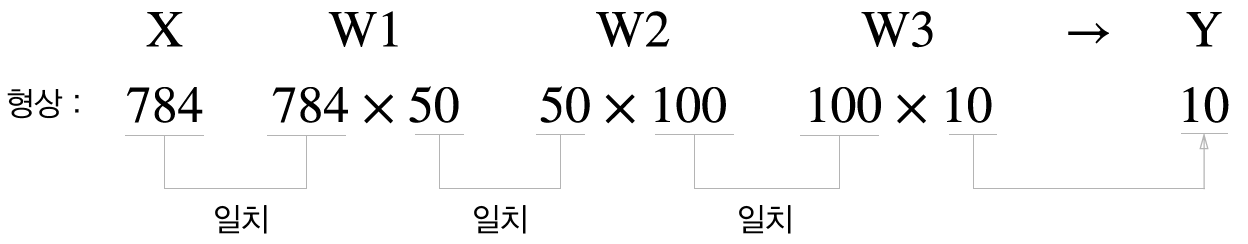

<br>
전체적으로 보면 원소 784개로 구성된 1차원 배열이 입력되어 마짐자겡는 원소가 10개인 1차우너 배열이 출력되는 흐름이다.<br> 이는 이미지 데이터를 1장만 입력했을때 흐름이다. <br> 그렁다면 이미지 여러 장을 한꺼번에 입력하는 경우를 생각해보자. <br>가령 이미지 100개를 묶어 predict()함수에 한 번에 넘기는 것이다. x의 형상은 2차원 배열인 100*784인 하나의 입력 데이터로 표현하면 된다.
<br>

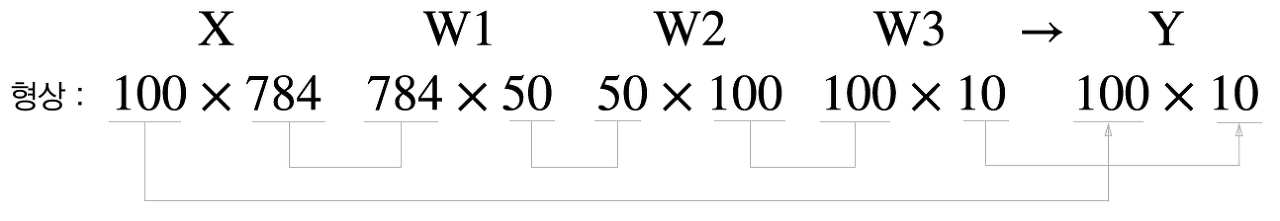

<br>
이렇게 되면 입력 데이터의 형상은 100*784, 출력 데이터의 형상은 100*10이 된다.<br>
이처럼 하나로 묶은 입력 데이터를 배치라고 한다, 배치가 곧 묶음이란 의미다. 이제 배치 처리를 구현해보겠다.

In [ ]:
x, y= get_data()
network=init_network()

batch_size=100
accuracy_cnt=0

for i in range(0, len(x), batch_size):
  x_batch=x[i:i+batchsize]
  y_batch=predict(network, x_batch)
  p= np.argmax(y_batch,axis=1)
  accuracy_cnt += np.sum(p==t[i:i+batch_size])

print("Accuracy:"+ str(float(accuracy_cnt)/len(x)))

바뀐 부분부터 풀어보자. <br>우선 range() 함수이다. range()함수는 range처럼 인수를 2개 지정해 호출하면 start에서 end-1까지의 정수로 이뤄진 리스트를 한환한다.<br> 또 range(start, end,step) 처럼 인수를 3개 지정하면 start에서 end-1까지 step 간격으로 증가하는 리스트를 반환한다.<br> 이 예에서 x[i:i+batch_size]은 입력 데이터의 i번째 부터 i+batch_size번째 까지의 데이터를 묶는다는 의미다. <br>이 예에서는 batch_size가 100이므로 x[0:100],x[100:200],.. 와 같이 앞에서부터 100장씩 묶어 꺼내게 된다.<br> 그리고 앞에서 나온 argmax()는 최댓값의 인덱스를 가져온다.<br> 다만 여기서는 axis=1이라는 인수를 추가했다. <br>이는 100*10 배열중 1번째 차원을 구성하는 각 원소에서 최댓값의 인덱스를 찾도록 한것이다.

In [4]:
import numpy as np
x=np.array([[0.1,0.8,0.1], [0.3,0.1,0.6],
            [0.2,0.5,0.3],[0.8,0.1,0.1]])
y=np.argmax(x,axis=1)
print(y)

[1 2 1 0]


마지막으로 배치 단위로 분류한 결과를 실제 답과 비교한다. 이를 위해 == 연산자를 사용해 넘파이 배열끼리 비교하여 bool배열을 만들고, 이 결과 배열에서 True가 몇개인지 센다.

In [5]:
y=np.array([1,2,1,0])
t=np.array([1,2,0,0])
print(y==t)
print(np.sum(y==t))

[ True  True False  True]
3


이상으로 배치 데이터로 효율적으로 빠르게 처리할 수 있었다. 